In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Check for missing values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Percentage of missing values

round(train_df.isnull().sum() * 100 / len(train_df.index), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

This `Cabin` column has lots of missing values. So, lets' drop it from the dataframe.

In [6]:
train_df = train_df.drop('Cabin', axis=1)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Additionally, `Name` and `Ticket` columns are not going to help us in making prediction. So, let's drop them as well.

In [8]:
train_df = train_df.drop(columns=['Name', 'Ticket'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [9]:
embarked_counts = train_df['Embarked'].astype('category').value_counts()
embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
count_sex = train_df['Sex'].astype('category').value_counts()
count_sex

male      577
female    314
Name: Sex, dtype: int64

In [11]:
count_parch = train_df['Parch'].astype('category').value_counts()
count_parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(train_df['Age'])
plt.show()

<Figure size 640x480 with 1 Axes>

Let's impute the missing values in the `Age` column with the median values.

In [14]:
train_df.loc[train_df['Age'].isnull(), ['Age']] = train_df['Age'].median()
train_df['Age'].isnull().sum()

0

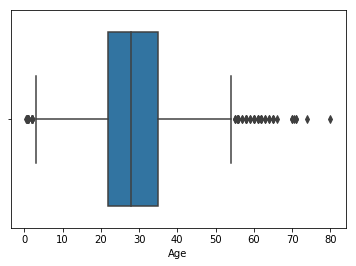

In [15]:
sns.boxplot(train_df['Age'])
plt.show()

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
def binary_func(x):
    if x == 'male':
        x = 1
    elif x == 'female':
        x = 0
    return x

y = list(map(binary_func, train_df['Sex']))
y = np.array(y)
y = pd.Series(y)
train_df['Sex'] = y
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 62.7+ KB


In [19]:
embarked = pd.get_dummies(train_df['Embarked'])
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
train_df = pd.concat([train_df, embarked], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [21]:
train_df = train_df.drop(columns=['Embarked'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [22]:
corr = train_df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.014665
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
C,-0.001205,0.168240,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


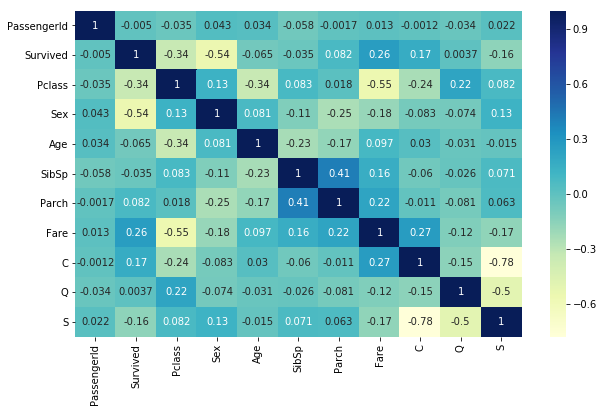

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [24]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
dtype: int64

In [25]:
# Check for outliers
train_df.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
95%,846.500000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,112.079150,1.000000,1.000000,1.000000
99%,882.100000,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,249.006220,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


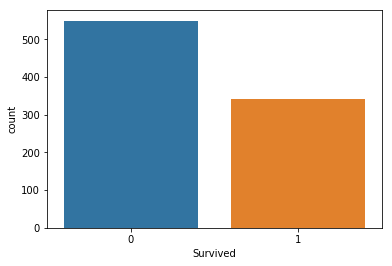

In [26]:
sns.countplot(train_df['Survived'])
plt.show()

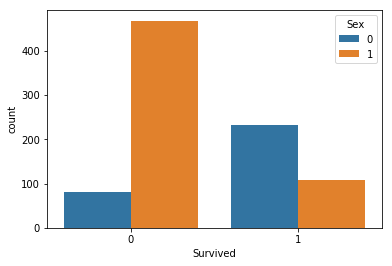

In [27]:
sns.countplot(train_df['Survived'], hue=train_df['Sex'])
plt.show()

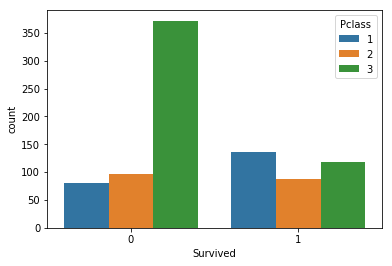

In [28]:
sns.countplot(train_df['Survived'], hue=train_df['Pclass'])
plt.show()

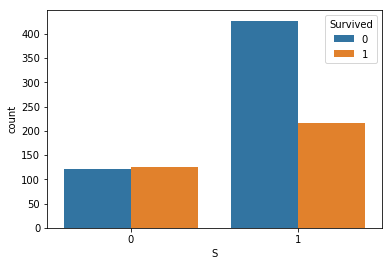

In [29]:
sns.countplot(train_df['S'], hue=train_df['Survived'])
plt.show()

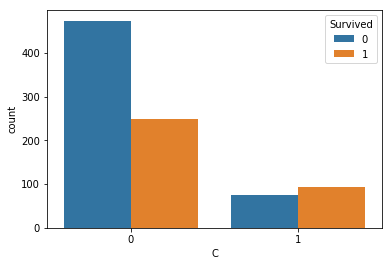

In [30]:
sns.countplot(train_df['C'], hue=train_df['Survived'])
plt.show()

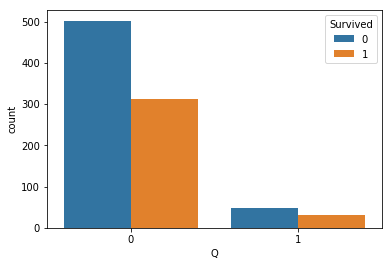

In [31]:
sns.countplot(train_df['Q'], hue=train_df['Survived'])
plt.show()

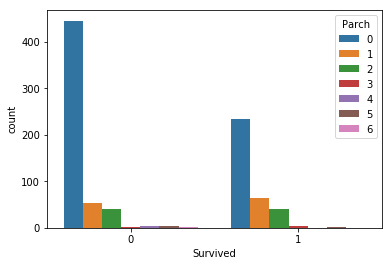

In [32]:
sns.countplot(train_df['Survived'], hue=train_df['Parch'])
plt.show()

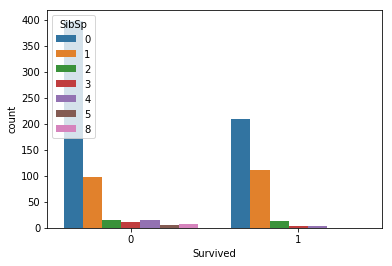

In [33]:
sns.countplot(train_df['Survived'], hue=train_df['SibSp'])
plt.show()

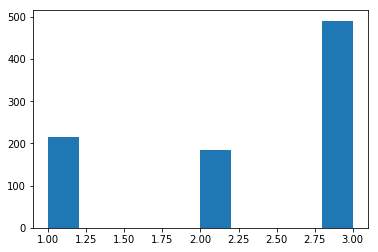

In [34]:
plt.hist(train_df['Pclass'])
plt.show()

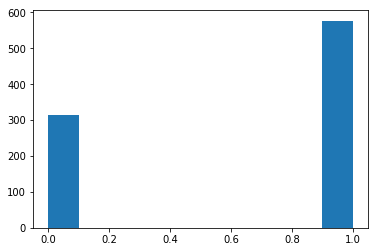

In [35]:
plt.hist(train_df['Sex'])
plt.show()

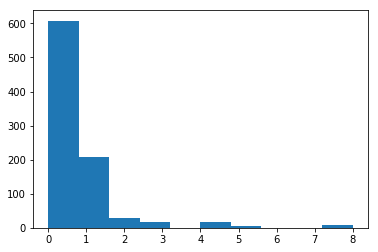

In [36]:
plt.hist(train_df['SibSp'])
plt.show()

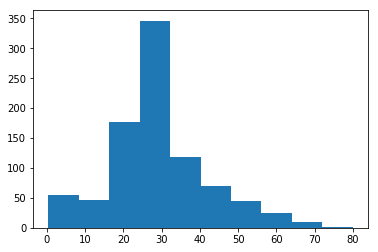

In [37]:
plt.hist(train_df['Age'])
plt.show()

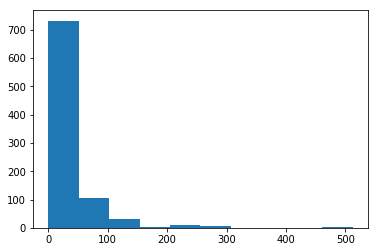

In [38]:
plt.hist(train_df['Fare'])
plt.show()

### Selecting Features to Train

In [39]:
X_train = train_df.drop(columns=['PassengerId', 'Survived'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [40]:
y_train = train_df['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,-0.565736,1,0,-0.502445,0,0,1
1,1,0,0.663861,1,0,0.786845,1,0,0
2,3,0,-0.258337,0,0,-0.488854,0,0,1
3,1,0,0.433312,1,0,0.420730,0,0,1
4,3,1,0.433312,0,0,-0.486337,0,0,1


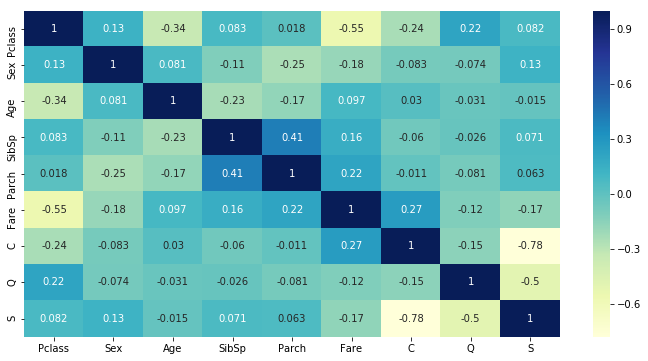

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Model Building

In [44]:
import statsmodels.api as sm

In [45]:
# Logistic regression model
log_reg_m1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
log_reg_m1_summary = log_reg_m1.fit().summary()
log_reg_m1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.47
Date:                Wed, 24 Jul 2019   Deviance:                       784.93
Time:                        00:30:12   Pearson chi2:                     902.
No. Iterations:                    19   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4470   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Pclass        -1.0987      0.144     -7.654      0.000      -1.380      -0.817
Sex           -2.7199      0.201    -13.555      0.000      -3.113      -2.327
Age           -0.5118      0.102     -5.013      0.000      -0.712      -0.312
SibSp         -0.3242      0.109     -2.978      0.003      -0.538      -0.111
Parch         -0.0886      0.119     -0.748      0.454      -0.321       0.144
Fare           0.0963      0.118      0.817      0.414      -0.135       0.327
C            -18.2924   1.23e+04     -0.001      0.999   -2.41e+04     2.4e+04
Q            -18.3552   1.23e+04     -0.001      0.999   -2.41e+04     2.4e+04
S            -18.7039   1.23e+04     -0.002      0.999   -2.41e+04     2.4e+04
==============================================================================
"""

### Feature Select Using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [47]:
rfe = RFE(LogisticRegression(), 5) # running RFE with 5 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([ True,  True, False, False, False, False,  True,  True,  True])

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', False, 2),
 ('SibSp', False, 3),
 ('Parch', False, 5),
 ('Fare', False, 4),
 ('C', True, 1),
 ('Q', True, 1),
 ('S', True, 1)]

Columns supported by RFE

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'C', 'Q', 'S'], dtype='object')

Columns not supported by RFE.

In [50]:
X_train.columns[~rfe.support_]

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Assessing the model with StatsModels

In [51]:
X_train_sm = sm.add_constant(X_train[col])
log_reg_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_reg_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.96
Date:                Wed, 24 Jul 2019   Deviance:                       819.92
Time:                        00:30:18   Pearson chi2:                     911.
No. Iterations:                    19   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5031   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
Pclass        -0.9370      0.111     -8.442      0.000      -1.155      -0.719
Sex           -2.6156      0.185    -14.143      0.000      -2.978      -2.253
C            -17.8772   1.25e+04     -0.001      0.999   -2.46e+04    2.46e+04
Q            -18.0259   1.25e+04     -0.001      0.999   -2.46e+04    2.46e+04
S            -18.4222   1.25e+04     -0.001      0.999   -2.46e+04    2.46e+04
==============================================================================
"""

### Checking VIFs

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,9.72
4,S,8.16
1,Sex,2.94
2,C,2.21
3,Q,2.20


We need `Pclass` because according to p-Value, it is statistically significant. So, let's drop `S` column and rebuild the model.

In [54]:
col = col.drop('S', 1)
col

Index(['Pclass', 'Sex', 'C', 'Q'], dtype='object')

In [55]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log_reg_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -410.18
Date:                Wed, 24 Jul 2019   Deviance:                       820.36
Time:                        00:30:22   Pearson chi2:                     913.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0946      0.309     10.013      0.000       2.489       3.700
Pclass        -0.9408      0.111     -8.487      0.000      -1.158      -0.724
Sex           -2.6211      0.185    -14.182      0.000      -2.983      -2.259
C              0.5421      0.224      2.417      0.016       0.103       0.982
Q              0.3955      0.312      1.268      0.205      -0.216       1.007
==============================================================================
"""

The `Q` column is still statistically insignificant. Hence, dropping it and rebuilding the model.

In [56]:
col = col.drop('Q', 1)
col

Index(['Pclass', 'Sex', 'C'], dtype='object')

In [57]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log_reg_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -410.98
Date:                Wed, 24 Jul 2019   Deviance:                       821.96
Time:                        00:30:23   Pearson chi2:                     903.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0861      0.309      9.976      0.000       2.480       3.692
Pclass        -0.9117      0.108     -8.430      0.000      -1.124      -0.700
Sex           -2.6429      0.184    -14.330      0.000      -3.004      -2.281
C              0.5105      0.223      2.292      0.022       0.074       0.947
==============================================================================
"""

All the variables are statistically significant.

In [58]:
# Recalculating the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,2.66
1,Sex,2.60
2,C,1.13


All the variables have a VIF value less than 5 which is great.

### Making Predictions on the Train Data

In [59]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.09180744, 0.93613255, 0.58688476, 0.89793259, 0.09180744,
       0.09180744, 0.38499418, 0.09180744, 0.58688476, 0.85486354])

In [60]:
y_train_pred_final = pd.DataFrame({'Survived': y_train.values, 'Survival_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId
0,0,0.091807,0
1,1,0.936133,1
2,1,0.586885,2
3,1,0.897933,3
4,0,0.091807,4


#### Creating new column 'Predicted' with 1 if Churn_Prob > 0.5 else 0

In [61]:
y_train_pred_final['Predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,Predicted
0,0,0.091807,0,0
1,1,0.936133,1,1
2,1,0.586885,2,1
3,1,0.897933,3,1
4,0,0.091807,4,0


In [62]:
from sklearn import metrics

In [63]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Predicted )
print(confusion)

[[443 106]
 [ 92 250]]


In [64]:
# Predicted     not_survived    survived
# Actual
# not_survived        443      106
# survived            92       250  

In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Predicted))

0.7777777777777778


So, the accuracy is almost 78%. This is quite good. Let's check for other metrics as well.

## Metrics beyond simply accuracy

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Checking the sensitivity of the logistic regression model
TP / float(TP+FN)

0.7309941520467836

In [68]:
# Checking specificity
TN / float(TN+FP)

0.8069216757741348

In [69]:
# Calculating false postive rate - predicting survival when a passenger has died.
print(FP/ float(TN+FP))

0.1930783242258652


In [70]:
# positive predictive value 
print (TP / float(TP+FP))

0.702247191011236


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8280373831775701


### ROC Curve

In [72]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob, drop_intermediate = False)

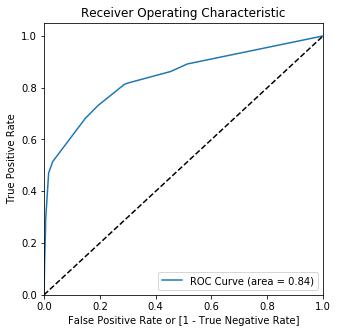

In [74]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

**### Compute Optimal Survival Probablity Cutoff Value

In [75]:
# Create columns with different probability cutoff values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.091807,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.936133,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.586885,2,1,1,1,1,1,1,1,0,0,0,0
3,1,0.897933,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.091807,4,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    conf_mat_1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(conf_mat_1))
    accuracy = (conf_mat_1[0,0]+conf_mat_1[1,1])/total1
    
    speci = conf_mat_1[0,0]/(conf_mat_1[0,0]+conf_mat_1[0,1])
    sensi = conf_mat_1[1,1]/(conf_mat_1[1,0]+conf_mat_1[1,1])
    cutoff_df.loc[i] =[i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.641975  0.891813  0.486339
0.2   0.2  0.667789  0.862573  0.546448
0.3   0.3  0.750842  0.812865  0.712204
0.4   0.4  0.777778  0.730994  0.806922
0.5   0.5  0.777778  0.730994  0.806922
0.6   0.6  0.794613  0.514620  0.969035
0.7   0.7  0.794613  0.514620  0.969035
0.8   0.8  0.722783  0.286550  0.994536
0.9   0.9  0.662177  0.122807  0.998179


<Figure size 864x576 with 0 Axes>

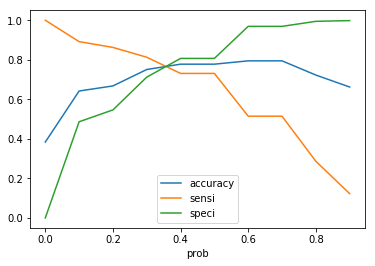

In [77]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
plt.figure(figsize=(12, 8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to consider it as a cutoff probability.

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.091807,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.936133,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.586885,2,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.897933,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.091807,4,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
# Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7508417508417509

So, the accuracy value gets reduced to 75% from ~78%.

In [80]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[391, 158],
       [ 64, 278]])

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Recalculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8128654970760234

In [83]:
# Specificity
TN / float(TN+FP)

0.7122040072859745

In [84]:
# False postive rate - predicting survival when a passenge is alive
print(FP/ float(TN+FP))

0.2877959927140255


In [85]:
# Positive predictive value 
print(TP / float(TP+FP))

0.6376146788990825


In [86]:
# Negative predictive value
print(TN / float(TN+ FN))

0.8593406593406593


#### Precision and Recall

Let's go over the confusion matrix again.

In [87]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted)
confusion

array([[391, 158],
       [ 64, 278]])

##### Precision
TP / TP + FP

In [88]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6376146788990825

##### Recall
TP / TP + FN

In [89]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8128654970760234

#### Using sklearn utilities for the same metrics

In [90]:
from sklearn.metrics import precision_score, recall_score

In [91]:
precision_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.6376146788990825

In [92]:
recall_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.8128654970760234

### Precision and recall tradeoff

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Survived, y_train_pred_final.final_predicted

(0      0
 1      1
 2      1
 3      1
 4      0
 5      0
 6      0
 7      0
 8      1
 9      1
 10     1
 11     1
 12     0
 13     0
 14     0
 15     1
 16     0
 17     1
 18     0
 19     1
 20     0
 21     1
 22     1
 23     1
 24     0
 25     1
 26     0
 27     0
 28     1
 29     0
       ..
 861    0
 862    1
 863    0
 864    0
 865    1
 866    1
 867    0
 868    0
 869    1
 870    0
 871    1
 872    0
 873    0
 874    1
 875    1
 876    0
 877    0
 878    0
 879    1
 880    1
 881    0
 882    0
 883    0
 884    0
 885    0
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64, 0      0
 1      1
 2      1
 3      1
 4      0
 5      0
 6      1
 7      0
 8      1
 9      1
 10     1
 11     1
 12     0
 13     0
 14     1
 15     1
 16     0
 17     0
 18     1
 19     1
 20     0
 21     0
 22     1
 23     1
 24     1
 25     1
 26     0
 27     1
 28     1
 29     0
       ..
 861    0
 862    1
 863    1
 864   

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

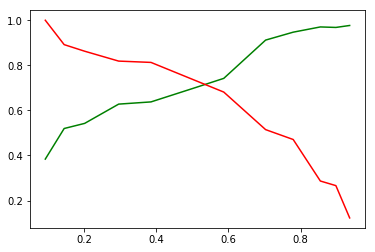

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [97]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Based on the quartiles, mean and standard deviation, there seem to be no outliers.

In [100]:
test_df.shape

(418, 11)

In [101]:
# Checking for missing value
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Based on our Logistic Regression model, we are concnered with the ```Pclass```, ```Sex``` and ```C```. These features are not missing from the test database, so we don't have to treat the missing values. However, we have to binary encode the ```Sex``` values and extract the ```C``` values from the test dataframe.

In [102]:
z = list(map(binary_func, test_df['Sex']))
z = np.array(z)
z = pd.Series(z)
test_df['Sex'] = z
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
test_embarked = pd.get_dummies(test_df['Embarked'])
test_embarked.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [104]:
test_df = pd.concat([test_df, test_embarked], axis=1)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [105]:
test_df = test_df.drop(columns=['Embarked'])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [106]:
test_df = test_df[['PassengerId', 'Pclass', 'Sex', 'C']]
test_df.head()

,PassengerId,Pclass,Sex,C
0,892,3,1,0
1,893,3,0,0
2,894,2,1,0
3,895,3,1,0
4,896,3,0,0


In [107]:
# Pandas function to generate a CSV file from a Pandas dataframe.
#test_df.to_csv('titanic-first-submission.csv')

In [109]:
X_test = test_df[['Pclass', 'Sex', 'C']]
X_test.head()

,Pclass,Sex,C
0,3,1,0
1,3,0,0
2,2,1,0
3,3,1,0
4,3,0,0


No need to scale the values as they are comparable.

In [110]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [121]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.091807
1    0.586885
2    0.200996
3    0.091807
4    0.586885
5    0.091807
6    0.586885
7    0.200996
8    0.702992
9    0.091807
dtype: float64

In [128]:
y_test_pred_final['Survival_Prob'] = pd.DataFrame(y_test_pred)
y_test_pred_final['Survived'] = y_test_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final = y_test_pred_final[['Survival_Prob', 'Survived']]
y_test_pred_final['PassengerId'] = test_df.PassengerId
y_test_pred_final.head()

,Survival_Prob,Survived,PassengerId
0,0.091807,0,892
1,0.586885,1,893
2,0.200996,0,894
3,0.091807,0,895
4,0.586885,1,896


In [129]:
df_for_submission = y_test_pred_final[['PassengerId', 'Survived']]
df_for_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [130]:
df_for_submission.to_csv('titanic-second-submission.csv')

In [131]:
df_for_submission.shape

(418, 2)